<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 25.4 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 35.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 31.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 31.3 MB/s eta 0:00:00


#### Step 1: Load the dataset


In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




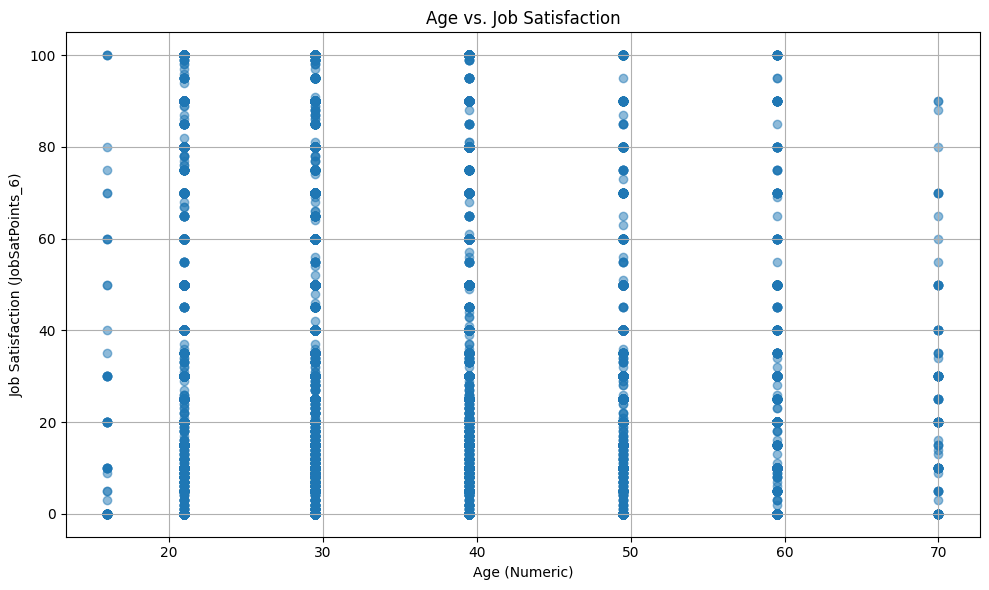

In [3]:
## Write your code here
# Convert Age to numeric (map age ranges to approximate midpoints)
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Drop rows with missing values in either AgeNumeric or JobSatPoints_6
scatter_df = df[['AgeNumeric', 'JobSatPoints_6']].dropna()

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(scatter_df['AgeNumeric'], scatter_df['JobSatPoints_6'], alpha=0.5)
plt.title('Age vs. Job Satisfaction')
plt.xlabel('Age (Numeric)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


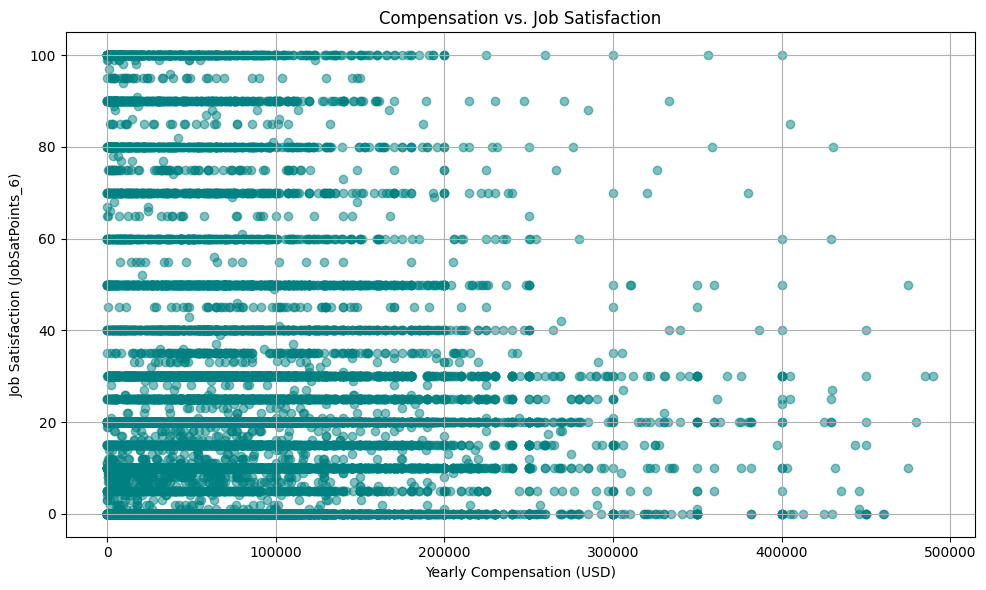

In [4]:
## Write your code here
# Drop rows with missing values in ConvertedCompYearly or JobSatPoints_6
scatter_df = df[['ConvertedCompYearly', 'JobSatPoints_6']].dropna()

# Optional: Filter extreme compensation values for better visibility
scatter_df = scatter_df[scatter_df['ConvertedCompYearly'] < 500000]

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(scatter_df['ConvertedCompYearly'], scatter_df['JobSatPoints_6'], alpha=0.5, color='teal')
plt.title('Compensation vs. Job Satisfaction')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


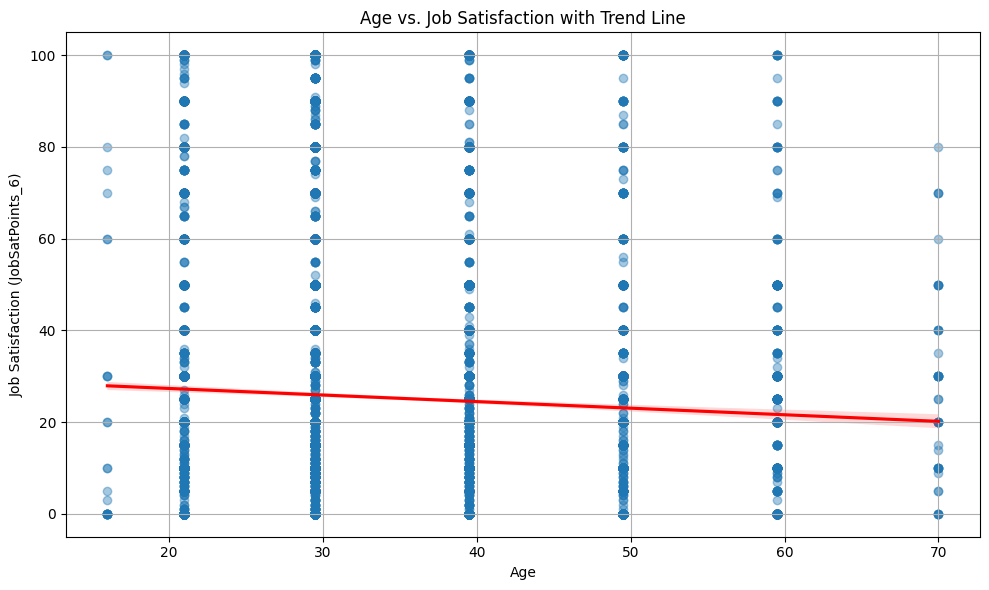

In [12]:
## Write your code here
# Convert 'Age' to numeric, coercing errors for non-numeric values
!pip install seaborn
import seaborn as sns
#df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Drop rows with missing values in Age or JobSatPoints_6
age_sat_df = df[['AgeNumeric', 'JobSatPoints_6']].dropna()

# Plot the scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='AgeNumeric', y='JobSatPoints_6', data=age_sat_df, scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title('Age vs. Job Satisfaction with Trend Line')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


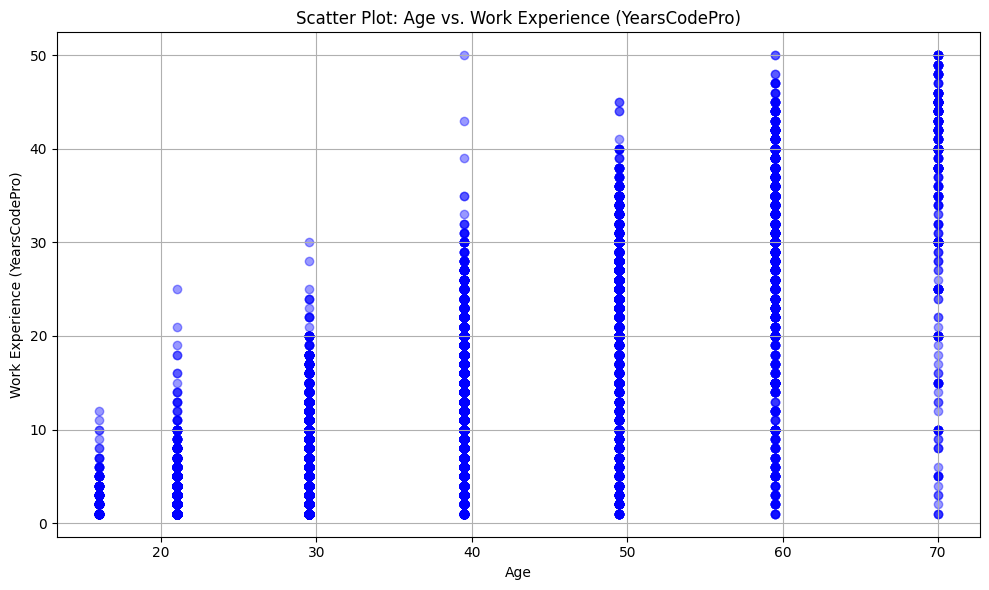

In [7]:
## Write your code here
# Convert Age and YearsCodePro to numeric values
#df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop missing values
scatter_df = df[['AgeNumeric', 'YearsCodePro']].dropna()

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(scatter_df['AgeNumeric'], scatter_df['YearsCodePro'], alpha=0.4, color='blue')
plt.title('Scatter Plot: Age vs. Work Experience (YearsCodePro)')
plt.xlabel('Age')
plt.ylabel('Work Experience (YearsCodePro)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


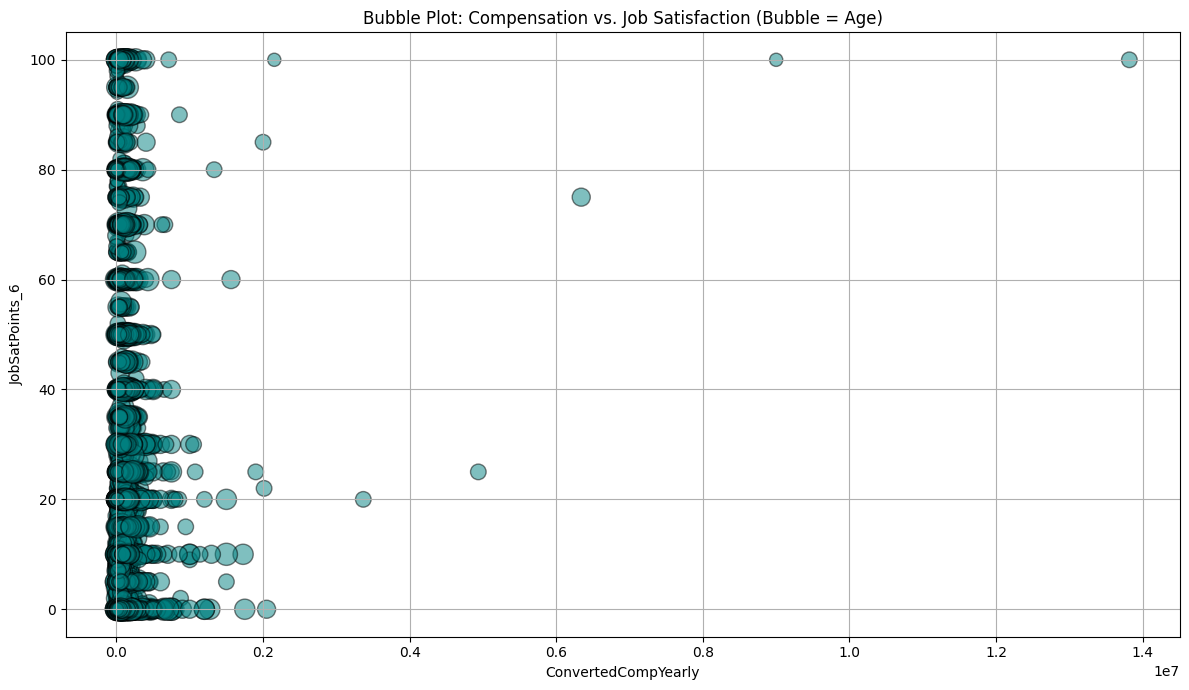

In [8]:
## Write your code here
# Convert relevant columns to numeric
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
#df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Drop missing values
bubble_df = df[['ConvertedCompYearly', 'JobSatPoints_6', 'AgeNumeric']].dropna()

# Normalize bubble size for better visibility
bubble_df['Age_scaled'] = bubble_df['AgeNumeric'] / bubble_df['AgeNumeric'].max() * 300

# Create bubble plot
plt.figure(figsize=(12, 7))
plt.scatter(
    bubble_df['ConvertedCompYearly'],
    bubble_df['JobSatPoints_6'],
    s=bubble_df['Age_scaled'],  # bubble size
    alpha=0.5,
    color='teal',
    edgecolors='black'
)

plt.title('Bubble Plot: Compensation vs. Job Satisfaction (Bubble = Age)')
plt.xlabel('ConvertedCompYearly')
plt.ylabel('JobSatPoints_6')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


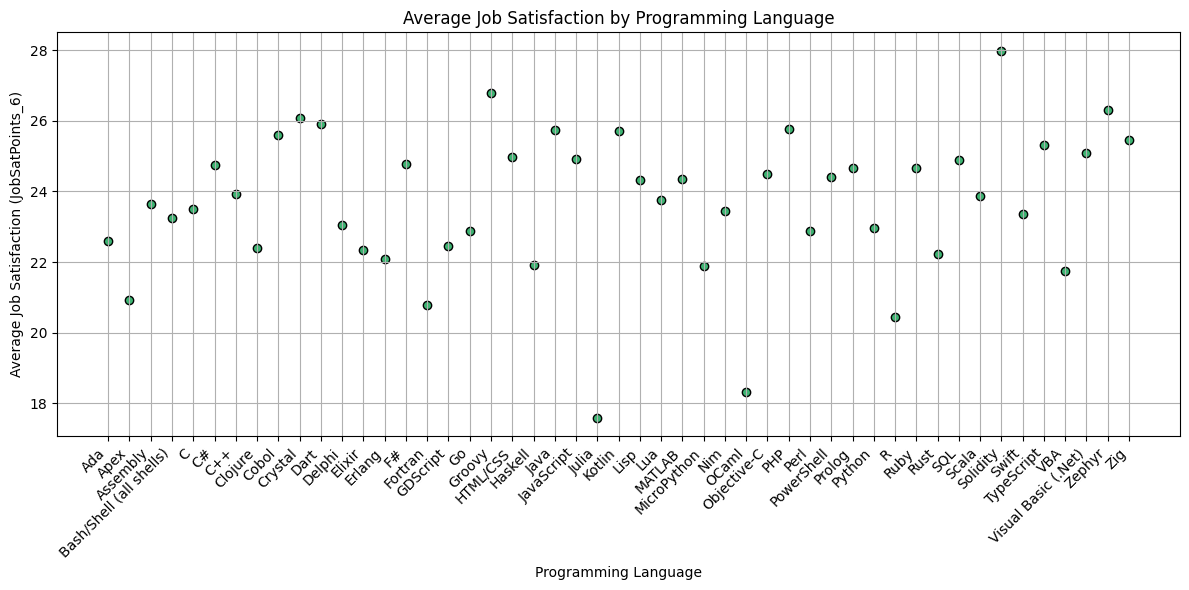

In [9]:
## Write your code here
# Convert job satisfaction column to numeric
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Drop rows with missing LanguageHaveWorkedWith or JobSatPoints_6
df = df.dropna(subset=['LanguageHaveWorkedWith', 'JobSatPoints_6'])

# Create a list of (language, job satisfaction) pairs
language_satisfaction = []

for _, row in df.iterrows():
    languages = row['LanguageHaveWorkedWith'].split(';')  # Assuming languages are semicolon-separated
    for lang in languages:
        language_satisfaction.append((lang.strip(), row['JobSatPoints_6']))

# Convert to DataFrame
lang_sat_df = pd.DataFrame(language_satisfaction, columns=['Language', 'JobSat'])

# Group by language and compute average job satisfaction
lang_grouped = lang_sat_df.groupby('Language').mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(lang_grouped['Language'], lang_grouped['JobSat'], color='mediumseagreen', edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.title("Average Job Satisfaction by Programming Language")
plt.xlabel("Programming Language")
plt.ylabel("Average Job Satisfaction (JobSatPoints_6)")
plt.grid(True)
plt.tight_layout()
plt.show()

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


/tmp/ipykernel_302/2245621446.py:27: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


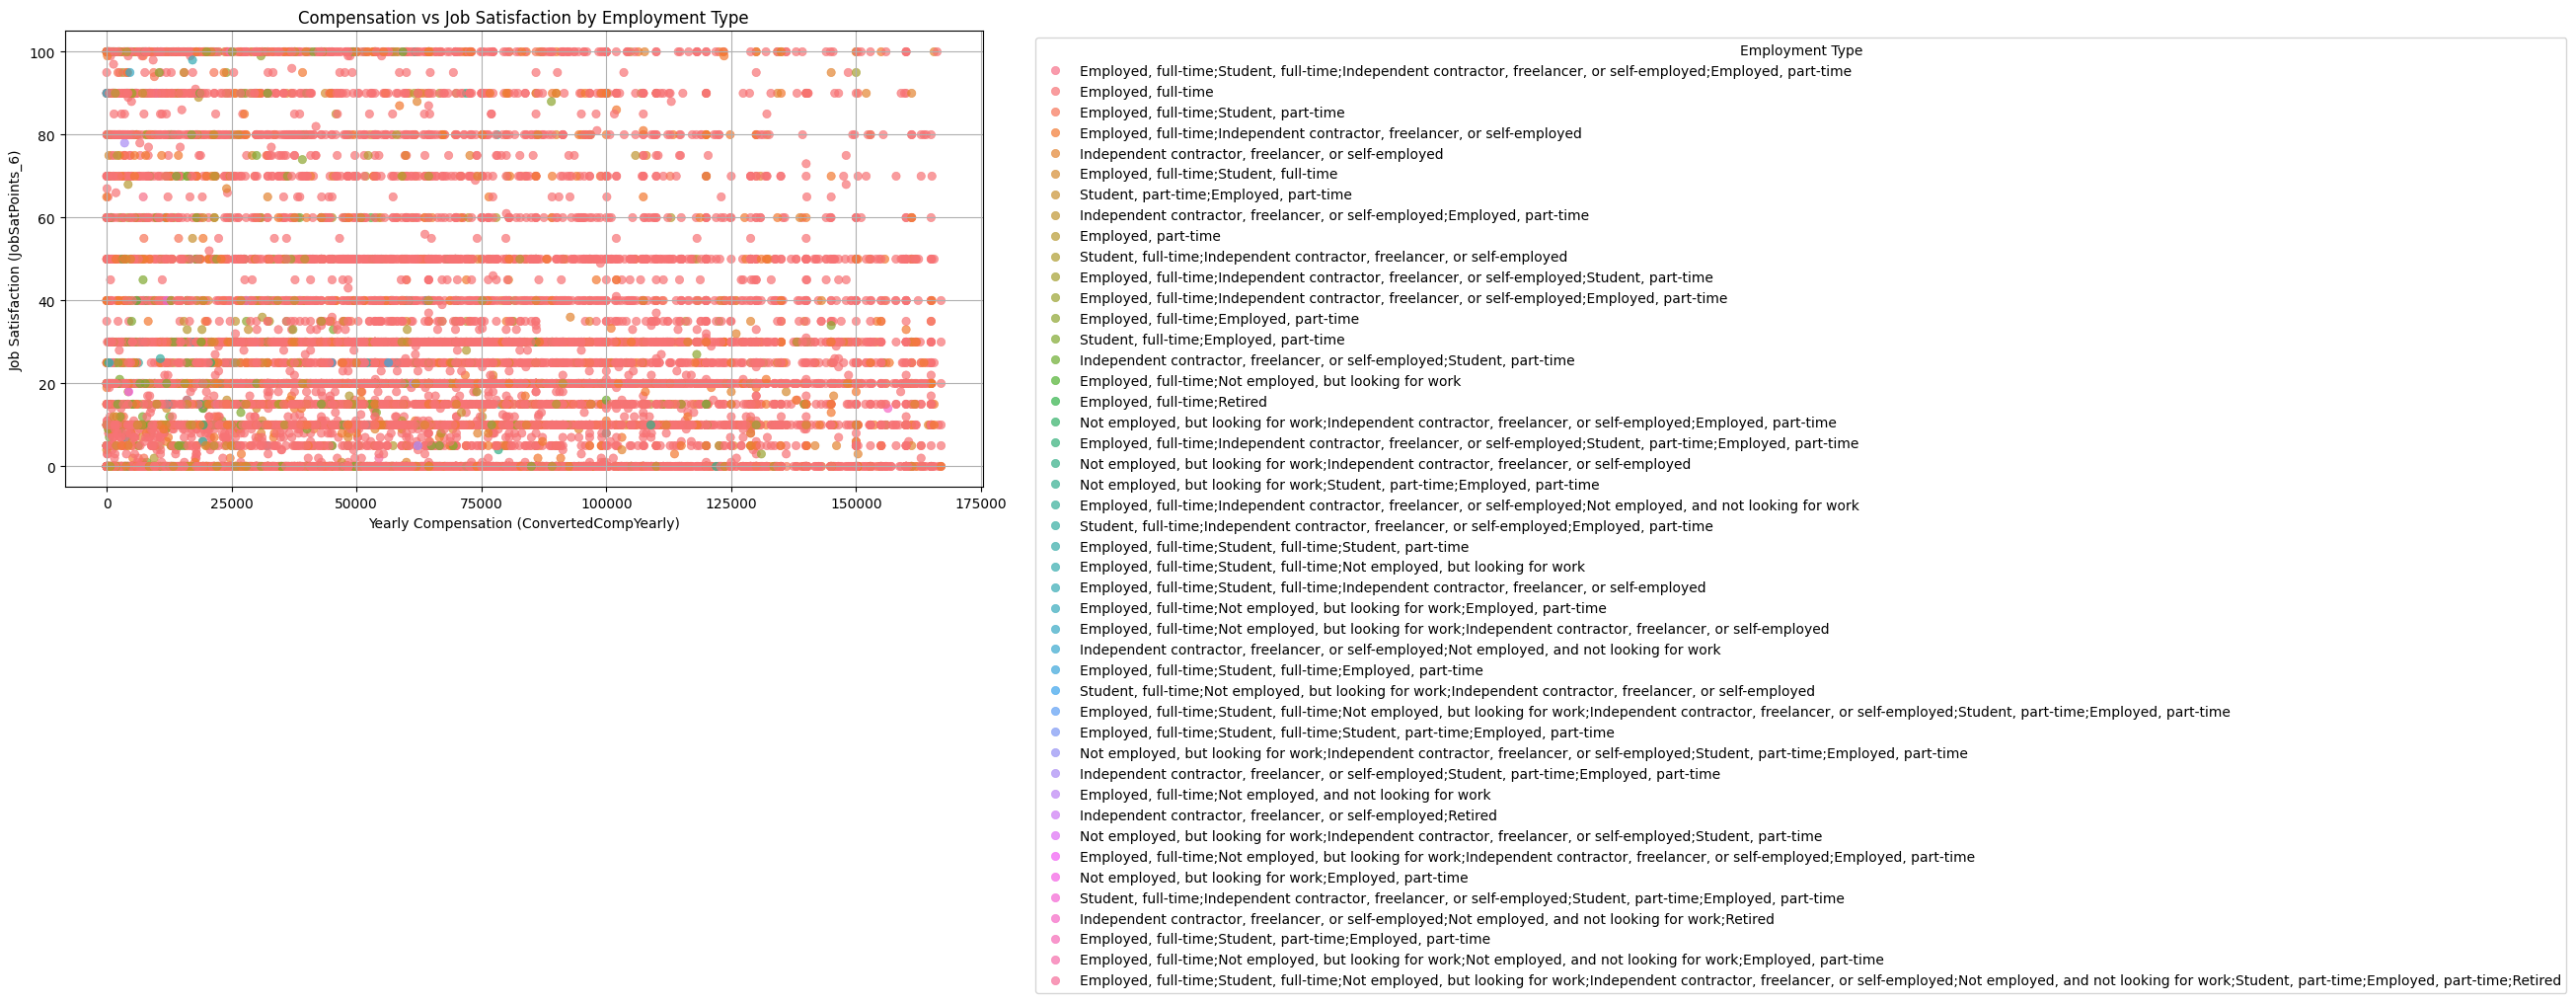

In [13]:
## Write your code here
# Clean and convert data
import seaborn as sns
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

# Drop rows with missing critical values
df = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Employment'])

# Optional: Limit extreme compensation values for better visibility
df = df[df['ConvertedCompYearly'] < df['ConvertedCompYearly'].quantile(0.95)]

# Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df,
                x='ConvertedCompYearly',
                y='JobSatPoints_6',
                hue='Employment',
                alpha=0.7,
                edgecolor=None)

plt.title("Compensation vs Job Satisfaction by Employment Type")
plt.xlabel("Yearly Compensation (ConvertedCompYearly)")
plt.ylabel("Job Satisfaction (JobSatPoints_6)")
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


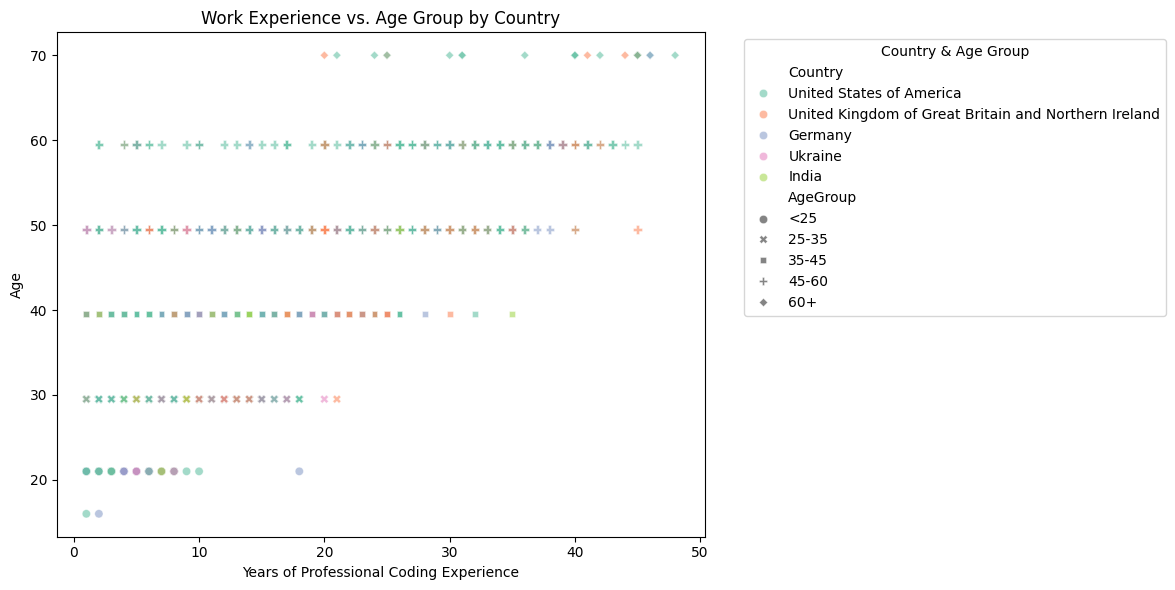

In [14]:
## Write your code here
# Convert to numeric, handling non-numeric gracefully
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
#df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Drop missing values for relevant columns
df_clean = df[['YearsCodePro', 'AgeNumeric', 'Country']].dropna()

# Create Age Group buckets
age_bins = [0, 25, 35, 45, 60, 100]
age_labels = ['<25', '25-35', '35-45', '45-60', '60+']
df_clean['AgeGroup'] = pd.cut(df_clean['AgeNumeric'], bins=age_bins, labels=age_labels)

# Optional: Focus on top 5 countries
top_countries = df_clean['Country'].value_counts().nlargest(5).index
df_filtered = df_clean[df_clean['Country'].isin(top_countries)]

# Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_filtered,
    x='YearsCodePro',
    y='AgeNumeric',
    hue='Country',
    style='AgeGroup',
    alpha=0.6,
    palette='Set2'
)
plt.title('Work Experience vs. Age Group by Country')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Age')
plt.legend(title='Country & Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
